In [139]:
import numpy as np
import pylabnet.hardware.spectrum_analyzer.agilent_e4405B as sa_hardware
from pylabnet.network.client_server import agilent_e4405B
from pylabnet.network.client_server import dio_breakout
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [142]:
sa = agilent_e4405B.Client(
    host='192.168.50.108',
    port=29654
)

# Reset spectrum analzyer
sa.write('*RST')

(6, <StatusCode.success: 0>)

In [209]:
dio_box = dio_breakout.Client(
    host='192.168.50.109',
    port=47745
)


In [226]:
VA = np.zeros(100)
PA = np.zeros(100)
with open('power.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    ii = 0
    for row in reader:
        VA[ii] = float(row['0.0'])
        PA[ii] = float(row['1.0'])
        ii = ii+1


In [225]:
float(row['0.0'])

5.0

In [227]:
VA

array([0.05050505, 0.1010101 , 0.15151515, 0.2020202 , 0.25252525,
       0.3030303 , 0.35353535, 0.4040404 , 0.45454545, 0.50505051,
       0.55555556, 0.60606061, 0.65656566, 0.70707071, 0.75757576,
       0.80808081, 0.85858586, 0.90909091, 0.95959596, 1.01010101,
       1.06060606, 1.11111111, 1.16161616, 1.21212121, 1.26262626,
       1.31313131, 1.36363636, 1.41414141, 1.46464646, 1.51515152,
       1.56565657, 1.61616162, 1.66666667, 1.71717172, 1.76767677,
       1.81818182, 1.86868687, 1.91919192, 1.96969697, 2.02020202,
       2.07070707, 2.12121212, 2.17171717, 2.22222222, 2.27272727,
       2.32323232, 2.37373737, 2.42424242, 2.47474747, 2.52525253,
       2.57575758, 2.62626263, 2.67676768, 2.72727273, 2.77777778,
       2.82828283, 2.87878788, 2.92929293, 2.97979798, 3.03030303,
       3.08080808, 3.13131313, 3.18181818, 3.23232323, 3.28282828,
       3.33333333, 3.38383838, 3.43434343, 3.48484848, 3.53535354,
       3.58585859, 3.63636364, 3.68686869, 3.73737374, 3.78787

In [143]:
marka = sa_hardware.E4405BMarker(sa,'Upper Sideband',1)

In [144]:
sa.set_center_frequency(12.8e9)
sa.set_frequency_span(1e9)

marka.set_freq(12.8e9)

In [213]:
tot_powa = 0
att_V = np.linspace(0,5,100)
powa = np.zeros(100)

for ii in range(100):
    dio_box.set_high_voltage(1, 0, att_V[ii])
    tot_powa = 0    
    for jj in range(100):
        time.sleep(0.01)
        tot_powa = tot_powa + marka.get_power()

    powa[ii] = tot_powa/100
    print("done for voltage" + str(att_V[ii]))


done for voltage0.0
done for voltage0.050505050505050504
done for voltage0.10101010101010101
done for voltage0.15151515151515152
done for voltage0.20202020202020202
done for voltage0.25252525252525254
done for voltage0.30303030303030304
done for voltage0.35353535353535354
done for voltage0.40404040404040403
done for voltage0.45454545454545453
done for voltage0.5050505050505051
done for voltage0.5555555555555556
done for voltage0.6060606060606061
done for voltage0.6565656565656566
done for voltage0.7070707070707071
done for voltage0.7575757575757576
done for voltage0.8080808080808081
done for voltage0.8585858585858586
done for voltage0.9090909090909091
done for voltage0.9595959595959596
done for voltage1.0101010101010102
done for voltage1.0606060606060606
done for voltage1.1111111111111112
done for voltage1.1616161616161615
done for voltage1.2121212121212122
done for voltage1.2626262626262625
done for voltage1.3131313131313131
done for voltage1.3636363636363635
done for voltage1.4141414

In [210]:
from pylabnet.hardware.awg.awg_utils import convert_awg_pin_to_dio_board
board, channel = convert_awg_pin_to_dio_board(12)





In [212]:
dio_box.set_high_voltage(board, channel, 0)
dio_box.get_high_voltage(1,0)

0

4.9999237048905165

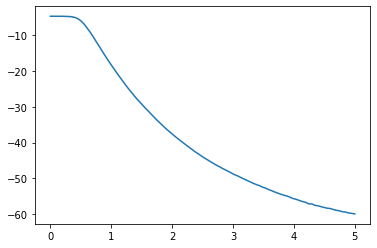

In [214]:
plt.plot(att_V, powa)

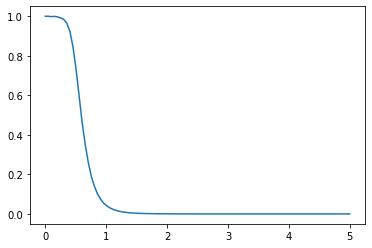

In [215]:
plt.plot(att_V, 10**(powa/10)/10**(powa[0]/10))

In [99]:
V = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 5])
AMP = np.array([-6.104220000000001, -6.111129999999996, -6.118030000000004, -6.166059999999999, 
    -6.426230000000001, -7.335420000000002, -9.080200000000007, -11.37290999999999, -13.884049999999993, -16.43667,
    -18.846849999999996, -21.188329999999993, -23.500870000000006, -25.693140000000003, -27.748250000000006,
    -29.627580000000027, -31.445060000000012, -33.16287, -34.77020999999998, -36.19998999999995, -37.51168, -38.76224999999999, 
    -39.909489999999984, -40.98482, -42.13827000000001, -43.10771000000002, -44.093819999999965, -44.912049999999994, -45.82993000000002,
    -46.47308000000001, -47.39425000000002, -48.03166000000002, -48.614429999999984, -49.21004, -49.90262000000001, -50.35494999999996, -60])

In [218]:
import csv
with open('power.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for ii in range(100):
        
        writer.writerow([att_V[ii], 10**(powa[ii]/10)/10**(powa[0]/10)])

In [228]:
fun = interp1d(VA, PA, kind='quadratic')

In [134]:
inv_fun = interp1d(10**(AMP/10)/10**(AMP[0]/10), V, kind='linear')

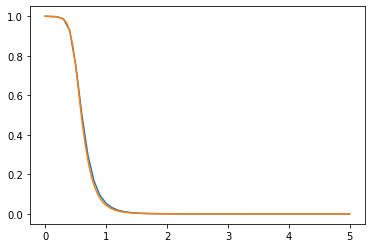

In [216]:
plt.plot(V, 10**(AMP/10)/10**(AMP[0]/10))
plt.plot(att_V, 10**(powa/10)/10**(powa[0]/10))
#plt.plot(np.linspace(0,5,100), fun(np.linspace(0,5,100)))

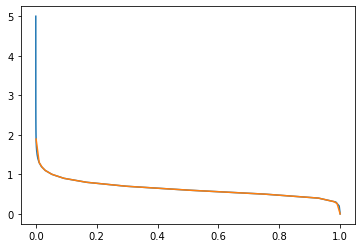

In [231]:
plt.plot(10**(AMP/10)/10**(AMP[0]/10), V)
plt.plot(np.linspace(0.001,1,100), inv_fun(np.linspace(0.001,1,100)))

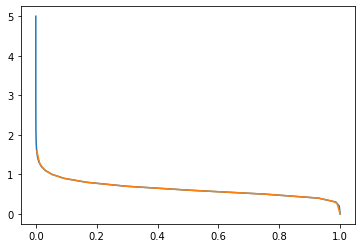

In [135]:
plt.plot(10**(AMP/10)/10**(AMP[0]/10), V)
plt.plot(np.linspace(0.003,1,100), inv_fun(np.linspace(0.003,1,100)))

In [138]:
10**(AMP[-1]/10)/10**(AMP[0]/10)

4.077763178997792e-06

In [109]:
10**(AMP[-1]/20)/10**(AMP[0]/20)

0.0020193472160571577

In [130]:
inv_fun(0.1)

array(1.32193916)

In [124]:
voltage = 0.001
if voltage >= 0.001 and voltage < 2.1:
    voltage = 2.1

In [133]:

for power in np.linspace(0,1.0,20):
    if power < 0.001:
        voltage = 5.0
    if power >= 0.001 and power < 0.0021:
        voltage = inv_fun(0.0021)
    if power >= 0.0021:
        voltage = inv_fun(power)

    print(voltage)


5.0
1.6148274408649554
1.2986158879860685
1.1442587259135393
1.0368477419899274
0.9558591599386641
0.8890006286865229
0.838380899956476
0.790703672627503
0.7522541135653075
0.713804554503112
0.6795164224094947
0.6475592554110855
0.6156020884126762
0.5829449119050611
0.5496199544268389
0.5162949969486167
0.47191450434805576
0.4169556013765104
0.0


In [132]:
voltage

array(0.)

In [257]:
VA = np.zeros(100)
PA = np.zeros(100)
with open("D:\\Dropbox\\Dropbox (Lukin SiV)\\SiV Quick Sharing\\B16 python experiments\\powerfile\\power.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    ii = 0
    for row in reader:
        VA[ii] = float(row['0.0'])
        PA[ii] = float(row['1.0'])
        ii = ii+1


inv_fun = interp1d(PA[:-1]**(1/2), VA[:-1], kind='linear')

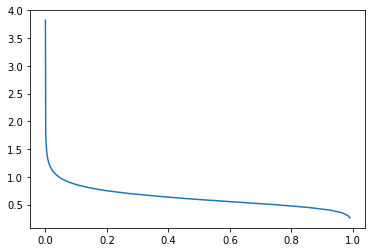

In [247]:
plt.plot(np.linspace(0.0001,0.99,1000), inv_fun(np.linspace(0.00001,0.99,1000)))

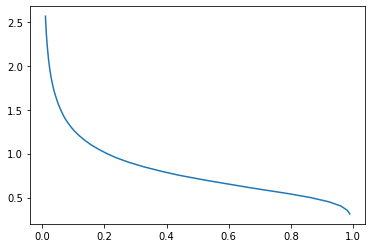

In [259]:
plt.plot(np.linspace(0.01,0.99,1000), inv_fun(np.linspace(0.01,0.99,1000)))

In [240]:
VA

array([0.05050505, 0.1010101 , 0.15151515, 0.2020202 , 0.25252525,
       0.3030303 , 0.35353535, 0.4040404 , 0.45454545, 0.50505051,
       0.55555556, 0.60606061, 0.65656566, 0.70707071, 0.75757576,
       0.80808081, 0.85858586, 0.90909091, 0.95959596, 1.01010101,
       1.06060606, 1.11111111, 1.16161616, 1.21212121, 1.26262626,
       1.31313131, 1.36363636, 1.41414141, 1.46464646, 1.51515152,
       1.56565657, 1.61616162, 1.66666667, 1.71717172, 1.76767677,
       1.81818182, 1.86868687, 1.91919192, 1.96969697, 2.02020202,
       2.07070707, 2.12121212, 2.17171717, 2.22222222, 2.27272727,
       2.32323232, 2.37373737, 2.42424242, 2.47474747, 2.52525253,
       2.57575758, 2.62626263, 2.67676768, 2.72727273, 2.77777778,
       2.82828283, 2.87878788, 2.92929293, 2.97979798, 3.03030303,
       3.08080808, 3.13131313, 3.18181818, 3.23232323, 3.28282828,
       3.33333333, 3.38383838, 3.43434343, 3.48484848, 3.53535354,
       3.58585859, 3.63636364, 3.68686869, 3.73737374, 3.78787

In [260]:
PA**(1/2)

array([0.99991481, 0.99904603, 0.99959598, 0.99842397, 0.99550971,
       0.99189568, 0.98221938, 0.96101353, 0.91982562, 0.85645688,
       0.77290924, 0.67847445, 0.59261958, 0.50911161, 0.43402276,
       0.37206644, 0.31748156, 0.27141197, 0.23315434, 0.20231915,
       0.1754949 , 0.15210833, 0.13320254, 0.11631574, 0.10187767,
       0.09014175, 0.07975997, 0.07080346, 0.06364525, 0.05709565,
       0.05124795, 0.04636262, 0.04177197, 0.03764307, 0.0341156 ,
       0.031096  , 0.02824899, 0.02583108, 0.02374762, 0.02182072,
       0.02011762, 0.01865355, 0.01724775, 0.01596877, 0.01483927,
       0.01376989, 0.01279162, 0.01198914, 0.01120156, 0.01049548,
       0.00987979, 0.0092966 , 0.0087564 , 0.00827414, 0.00786577,
       0.00743366, 0.00707192, 0.00673788, 0.00637761, 0.00606882,
       0.0058323 , 0.00553893, 0.00528533, 0.00504856, 0.00482215,
       0.00460996, 0.00442817, 0.00428085, 0.00407143, 0.00395201,
       0.00376486, 0.00362944, 0.00348315, 0.00335731, 0.00323

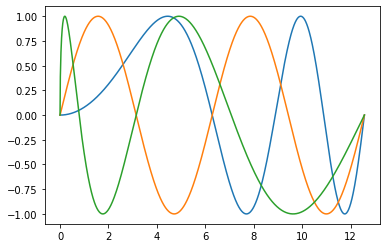

In [256]:
plt.plot(4*np.pi*np.linspace(0,1,1000),np.sin(4*np.pi*np.linspace(0,1,1000)**(2)))
plt.plot(4*np.pi*np.linspace(0,1,1000),np.sin(4*np.pi*np.linspace(0,1,1000)))
plt.plot(4*np.pi*np.linspace(0,1,1000),np.sin(4*np.pi*np.linspace(0,1,1000)**(1/2)))

In [262]:
AMP = np.linspace(0,1,101)
for amp in AMP:
    if amp < 0.001:
        voltage = 5.0
    elif amp > 0.999:
        voltage = 0.0
    else:
        voltage = inv_fun(amp)

    print(voltage)

5.0
2.565896504149305
2.074764382510368
1.837624520844091
1.688341564595148
1.578558013289341
1.4927555807104027
1.4198102794368608
1.3624686871732785
1.3138209103597185
1.2707067373418244
1.234213973757205
1.2011023315742475
1.1711943170709334
1.1434573799761312
1.116743318488751
1.0940684592010717
1.0724727091943176
1.052123800262181
1.0332956715379433
1.0144675428137058
0.9975205266342693
0.9811414933701749
0.9647624601060806
0.9505587955941693
0.937357495491305
0.9241561953884407
0.9109548952855764
0.8996760465245726
0.8887132711112915
0.8777504956980106
0.8667877202847295
0.8562556503843045
0.8470030797420234
0.8377505090997421
0.828497938457461
0.8192453678151799
0.8099927971728987
0.8016135932015545
0.7934618735973287
0.7853101539931029
0.7771584343888771
0.7690067147846513
0.7608549951804257
0.7535554401088709
0.7468294017750184
0.7401033634411659
0.7333773251073135
0.726651286773461
0.7199252484396086
0.713199210105756
0.7065334141986496
0.7004854828694023
0.694437551540155
0.

In [264]:
fstep = (35.0/0.05-25.0/0.05)/(201-1)

In [265]:
for ii in np.linspace(25.00, 35.00, 201):
    i = int((ii/0.05-25.0/0.05)/fstep)

    i = 50*i

    print(i)

0
50
100
100
150
250
300
350
350
400
500
550
600
600
700
750
800
850
850
950
1000
1050
1100
1100
1200
1250
1300
1350
1350
1450
1500
1550
1600
1600
1700
1750
1800
1850
1850
1950
2000
2050
2100
2100
2200
2250
2300
2350
2350
2450
2500
2550
2600
2600
2700
2750
2800
2850
2850
2950
3000
3050
3100
3100
3200
3250
3300
3350
3350
3450
3500
3550
3600
3600
3700
3750
3800
3850
3850
3950
4000
4050
4100
4100
4200
4250
4300
4350
4350
4450
4500
4550
4600
4600
4700
4750
4800
4850
4850
4950
5000
5050
5100
5100
5200
5250
5300
5350
5350
5450
5500
5550
5600
5600
5700
5750
5800
5850
5850
5950
6000
6050
6100
6100
6200
6250
6300
6350
6350
6450
6500
6550
6600
6600
6700
6750
6800
6850
6850
6950
7000
7000
7100
7100
7200
7250
7250
7350
7350
7450
7500
7500
7600
7600
7700
7750
7750
7850
7850
7950
8000
8000
8100
8100
8200
8250
8250
8350
8350
8450
8500
8500
8600
8600
8700
8750
8750
8850
8850
8950
9000
9000
9100
9100
9200
9250
9250
9350
9350
9450
9500
9500
9600
9600
9700
9750
9750
9850
9850
9950
10000


In [266]:
aa = [3,2,1,4,5,6,3]

In [270]:
aa[1:6:2]

[2, 4, 6]